In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [25]:
# Original 8 data points from the user
voltages = np.array([1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1])
current_densities = np.array([2.36, 3.25, 8.57, 26.89, 56.44, 91.90, 130.3, 173.3])
hydrogen = np.array([2.36, 3.25, 8.57, 26.89, 56.44, 91.90, 130.3, 173.3])


Text(0, 0.5, 'Current Density (mA/cm²)')

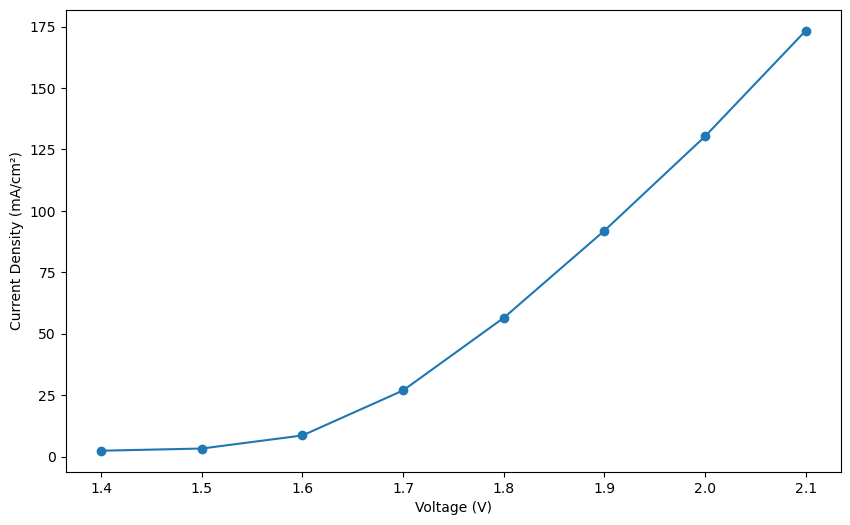

In [26]:

# Plot the original data points
plt.figure(figsize=(10, 6))
plt.plot(voltages, current_densities, '-o', label="Original Data Points")
plt.xlabel("Voltage (V)")
plt.ylabel("Current Density (mA/cm²)")


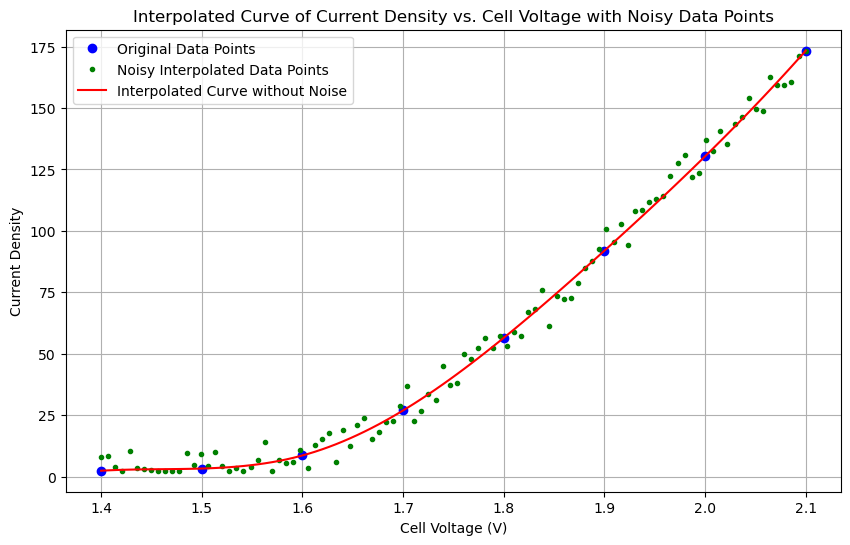

'./noisy_interpolated_current_density.xlsx'

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Original data points for voltages and corresponding current densities
voltages = np.array([1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1])
current_densities = np.array([2.36, 3.25, 8.57, 26.89, 56.44, 91.90, 130.3, 173.3])

# Plotting the original data points
plt.figure(figsize=(10, 6))
plt.plot(voltages, current_densities, 'o', label="Original Data Points", color="blue")

# Generating a smooth curve using cubic spline interpolation
voltage_range = np.linspace(voltages.min(), voltages.max(), 100)  # Create 100 voltage points for smoothness
spline = make_interp_spline(voltages, current_densities, k=3)  # Create a cubic spline for smooth interpolation
smoothed_current_densities = spline(voltage_range)

# Adding noise while ensuring current densities stay above the minimum original density
noise = np.random.normal(0, 5, smoothed_current_densities.shape)  # Noise with mean=0, std=5
noisy_current_densities = smoothed_current_densities + noise
noisy_current_densities = np.maximum(noisy_current_densities, current_densities.min())  # Ensure no values drop below minimum

# Plotting the noisy interpolated data points along with the smooth curve
plt.plot(voltage_range, noisy_current_densities, 'o', label="Noisy Interpolated Data Points", color="green", markersize=3)
plt.plot(voltage_range, smoothed_current_densities, '-', label="Interpolated Curve without Noise", color="red")

# Adding labels and title
plt.xlabel("Cell Voltage (V)")
plt.ylabel("Current Density")
plt.legend()
plt.title("Interpolated Curve of Current Density vs. Cell Voltage with Noisy Data Points")
plt.grid(True)
plt.show()

# Creating a DataFrame to tabulate the noisy interpolated values
data = {
    'Voltage (V)': voltage_range,
    'Current Density': noisy_current_densities
}
df = pd.DataFrame(data)

# Exporting the DataFrame to an Excel file
file_path = './noisy_interpolated_current_density.xlsx'
df.to_excel(file_path, index=False, engine='openpyxl')

file_path  # Display the file path for user reference


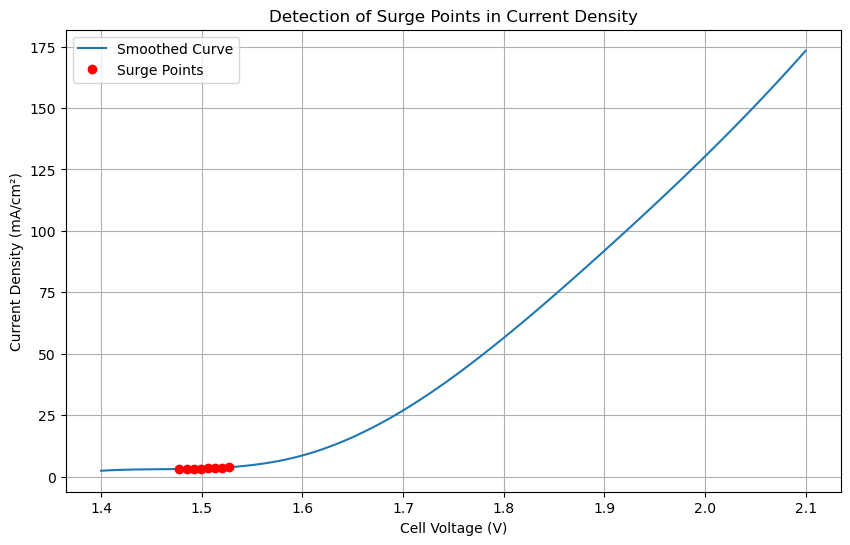

,Voltage (V),Current Density (mA/cm²)
0,1.477778,3.058886
1,1.484848,3.103348
2,1.491919,3.161577
3,1.498990,3.237485
4,1.506061,3.334982
5,1.513131,3.457978
6,1.520202,3.610385
7,1.527273,3.796113


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Original data points (example data)
voltages = np.array([1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1])
current_densities = np.array([2.36, 3.25, 8.57, 26.89, 56.44, 91.90, 130.3, 173.3])

# Generate smooth curve using interpolation for more points
voltage_range = np.linspace(voltages.min(), voltages.max(), 100)
spline = make_interp_spline(voltages, current_densities, k=3)
smoothed_current_densities = spline(voltage_range)

# Calculate the rate of change
rate_of_change = np.gradient(smoothed_current_densities, voltage_range)

# Define a surge threshold (e.g., 20% increase from previous rate)
threshold = 0.20  # 20% increase in rate as an example

# Detect points where the rate of change surges above threshold
surge_indices = np.where(rate_of_change[1:] > (1 + threshold) * rate_of_change[:-1])[0] + 1

# Plot the data and mark surge points
plt.figure(figsize=(10, 6))
plt.plot(voltage_range, smoothed_current_densities, label="Smoothed Curve")
plt.plot(voltage_range[surge_indices], smoothed_current_densities[surge_indices], 'ro', label="Surge Points")
plt.xlabel("Cell Voltage (V)")
plt.ylabel("Current Density (mA/cm²)")
plt.legend()
plt.title("Detection of Surge Points in Current Density")
plt.grid(True)
plt.show()

# Print the voltage and current density values at the detected surge points
surge_data = pd.DataFrame({
    'Voltage (V)': voltage_range[surge_indices],
    'Current Density (mA/cm²)': smoothed_current_densities[surge_indices]
})

surge_data
